In [ ]:
#1i) Plain gradient descent with a fixed learning rate (simple tuning)for OLS 

method MSE: [5.96670107e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [4.35098011e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
method MSE: [5.96670107e-05 8.16369691e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [4.35098011e-06 4.35098011e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
method MSE: [5.96670107e-05 8.16369691e-06 6.59427292e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [4.35098011e-06 4.35098011e-06 4.35098011e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000000

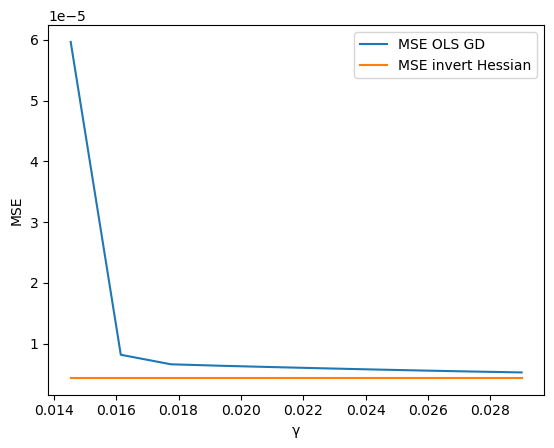

β inverse: [[ 1.57605655e-04]
 [ 1.47571499e-01]
 [ 7.83280154e-02]
 [-3.72873145e-01]
 [ 2.05274751e-01]
 [-9.94874225e-03]
 [-8.96775713e-03]] β OLS: [[-0.00350041]
 [ 0.20588162]
 [-0.1348283 ]
 [-0.09974146]
 [ 0.10798169]
 [-0.05067662]
 [ 0.01522138]]


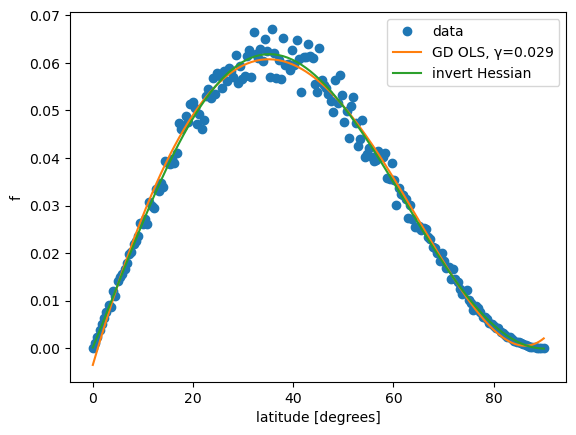

In [4]:
# Importing various packages
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from random import random, seed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

beta_OLS = np.random.randn(degree+1,1)
beta_inv = np.random.randn(degree+1,1)

Niterations = 1000000                                        #<----I need A LOT more iterrations to get an accurate result FOR OLS!! inv(H) works perfectly very easily.
ngammas = 10                                         
gammas = np.linspace(1.0/np.max(EigValues), 0.029, ngammas) #<---------learning rate should be between [1/maxeigenv(H), 1/mineigenv(H)]

MSE_OLS_GD = np.zeros(ngammas)
MSE_inv_GD = np.zeros(ngammas)

for g in range(ngammas):
    gamma = gammas[g]
    #print(gamma)

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)
        gradient_inv = (2.0/n)*X.T @ (X @ beta_inv-y_noisy) #(I'm using the OLS gradient, because if I use the Ridge one, it overflows)
        beta_OLS -= gamma*gradient_OLS
        beta_inv -= invH @ gradient_inv
        
    y_OLS_GD = X @ beta_OLS
    
    y_inv = X @ beta_inv

    MSE_OLS_GD[g]= MSE(y_noisy, y_OLS_GD)
    MSE_inv_GD[g]= MSE(y_noisy, y_inv)
    
    print('method MSE:',  MSE_OLS_GD, 'inverse Hessian MSE:', MSE_inv_GD)
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

plt.figure()
plt.plot(gammas, MSE_OLS_GD, label='MSE OLS GD')
plt.plot(gammas, MSE_inv_GD, label='MSE invert Hessian')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()

#for the last value of gamma:
print('β inverse:', beta_inv, 'β OLS:', beta_OLS)
ypredict_OLS_GD=X @ beta_OLS
yinv = X @ beta_inv

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, ypredict_OLS_GD, label='GD OLS, γ=0.029')
plt.plot(x*180/np.pi, yinv,  label='invert Hessian')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

In [1]:
#1ii) Plain gradient descent with a fixed learning rate (simple tuning)for Ridge 

In [ ]:
#Ridge parameter
nlambdas = 10 
lambdas = np.logspace(-4, 0, nlambdas) 

#leaning rate constants
Niterations = 100000  
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.029, ngammas)
y_Ridge_GD_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD = np.zeros((nlambdas, ngammas))

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    
    for g in range(ngammas):
        gamma = gammas[g]
        
        for iter in range(Niterations):
            gradient_Ridge = (2.0/n)*X.T @ (X @ (beta_Ridge)-y_noisy)+2*lmbda*beta_Ridge
            beta_Ridge -= gamma*gradient_Ridge 
            
        y_Ridge_GD = X @ beta_Ridge 
        
        y_Ridge_GD_array[l, g]=y_Ridge_GD
            
        MSE_Ridge_GD[l, g]= MSE(y_noisy, y_Ridge_GD)  
        
#finding the minimum value of the MSE
MSE_Ridge_GD_optimal = np.min(MSE_Ridge_GD)
conditon = (MSE_Ridge_GD == MSE_Ridge_GD_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

#saving the y that gives the optimal MSE
y_Ridge_GD_optimal= y_Ridge_GD_array[result]
y_Ridge_GD_optimal=(y_Ridge_GD_optimal[0])
#print(y_Ridge_GD_optimal)

print('method MSE=', MSE_Ridge_GD_optimal)

pd.DataFrame(MSE_Ridge_GD)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

#CAREFUL! The seamap annotates the values of l, g, NOT λ, γ!!!

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_Ridge_GD_optimal, label='GD-Ridge')
plt.plot(x*180/np.pi, ypredict_OLS_GD, label='OLS, γ=0.029')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')